<a href="https://colab.research.google.com/github/ziednciri/Enhancement-of-Chest-X-ray-Classification-via-Advanced-Deep-Learning-Approaches/blob/main/%C3%89volution_des_performances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 0) Mount Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Aperçu du DataFrame :


,Folder,Epoch,TrainLoss,ValLoss,ValAUC,ValPrecision,ValRecall,ValF1
0,images_001,1,1.321466,1.258599,0.736454,0.109788,0.523456,0.158550
1,images_001,2,1.208559,1.268229,0.736655,0.104640,0.624977,0.156328
2,images_001,3,1.121596,1.172090,0.756700,0.103995,0.600404,0.161239
3,images_001,4,1.067636,1.202179,0.753134,0.099055,0.659437,0.163122
4,images_001,5,1.023008,1.234616,0.756434,0.107271,0.609093,0.164538



=== MEILLEUR AUC ===
Folder          images_005
Epoch                   13
TrainLoss         0.469986
ValLoss           1.733702
ValAUC            0.828317
ValPrecision      0.214176
ValRecall         0.507037
ValF1             0.294771
Name: 79, dtype: object

=== MEILLEUR F1 ===
Folder          images_005
Epoch                   18
TrainLoss         0.369816
ValLoss           1.873535
ValAUC            0.824761
ValPrecision      0.226795
ValRecall           0.4788
ValF1             0.303888
Name: 84, dtype: object


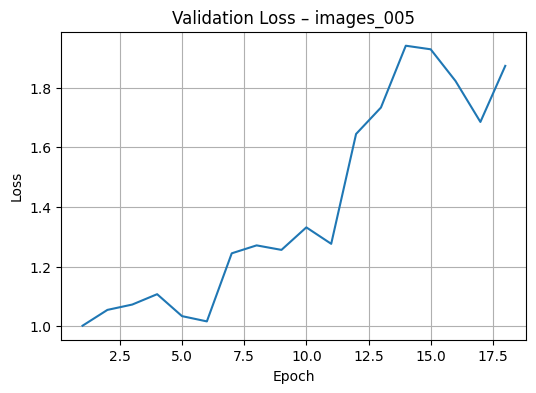

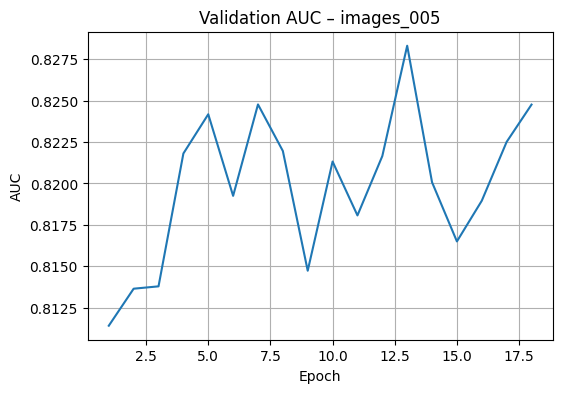

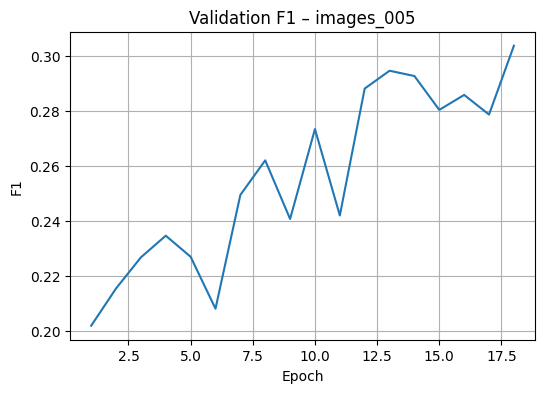


=== STATISTIQUES GLOBALES ===


,Epoch,TrainLoss,ValLoss,ValAUC,ValPrecision,ValRecall,ValF1
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,6.727273,0.735534,1.354758,0.791338,0.148817,0.585165,0.223348
std,4.576543,0.177871,0.339930,0.021613,0.024883,0.084964,0.029857
min,1.000000,0.369816,0.888409,0.736454,0.099055,0.396156,0.156328
25%,3.000000,0.614272,1.113756,0.775445,0.132641,0.525158,0.203545
50%,6.000000,0.719256,1.263414,0.791575,0.147022,0.591109,0.225896
75%,9.000000,0.854173,1.482992,0.810325,0.159603,0.643547,0.240750
max,20.000000,1.321466,2.841357,0.828317,0.226795,0.762512,0.303888


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

DATA_DIR = "/content/drive/MyDrive/NIH_ChestXray"
RESULTS_CSV = os.path.join(DATA_DIR, "training_results_swin.csv")

df = pd.read_csv(RESULTS_CSV)

print("Aperçu du DataFrame :")
display(df.head())

# =====================================================
# 1) Trouver meilleur AUC et meilleur F1
# =====================================================

best_auc = df.loc[df["ValAUC"].idxmax()]
best_f1  = df.loc[df["ValF1"].idxmax()]

print("\n=== MEILLEUR AUC ===")
print(best_auc)

print("\n=== MEILLEUR F1 ===")
print(best_f1)

# =====================================================
# 2) Courbes d'évolution pour un dossier spécifique
# =====================================================

folder = "images_005"   # change si besoin

df_f = df[df["Folder"] == folder]

plt.figure(figsize=(6,4))
plt.plot(df_f["Epoch"], df_f["ValLoss"])
plt.title(f"Validation Loss – {folder}")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(df_f["Epoch"], df_f["ValAUC"])
plt.title(f"Validation AUC – {folder}")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.grid()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(df_f["Epoch"], df_f["ValF1"])
plt.title(f"Validation F1 – {folder}")
plt.xlabel("Epoch")
plt.ylabel("F1")
plt.grid()
plt.show()

# =====================================================
# 3) Stats globales
# =====================================================

print("\n=== STATISTIQUES GLOBALES ===")
display(df.describe())


Aperçu du DataFrame :


,Folder,Epoch,TrainLoss,ValLoss,ValAUC,ValPrecision,ValRecall,ValF1
0,images_001,1,1.321466,1.258599,0.736454,0.109788,0.523456,0.158550
1,images_001,2,1.208559,1.268229,0.736655,0.104640,0.624977,0.156328
2,images_001,3,1.121596,1.172090,0.756700,0.103995,0.600404,0.161239
3,images_001,4,1.067636,1.202179,0.753134,0.099055,0.659437,0.163122
4,images_001,5,1.023008,1.234616,0.756434,0.107271,0.609093,0.164538



Dossiers détectés : ['images_001' 'images_002' 'images_003' 'images_004' 'images_005'
 'images_006' 'images_007' 'images_008' 'images_009' 'images_010']

=== Résumé par dossier ===


,Folder,BestEpoch_AUC,BestAUC,BestEpoch_F1,BestF1
0,images_001,18,0.786357,19,0.275879
1,images_002,13,0.771939,18,0.234751
2,images_003,4,0.795698,9,0.232425
3,images_004,5,0.791635,10,0.228185
4,images_005,13,0.828317,18,0.303888
5,images_006,6,0.806505,9,0.261562
6,images_007,3,0.825401,8,0.266706
7,images_008,4,0.825319,9,0.266425
8,images_009,4,0.816729,9,0.271007
9,images_010,4,0.798359,9,0.242293



=== Meilleur dossier selon AUC ===


,4
Folder,images_005
BestEpoch_AUC,13
BestAUC,0.828317
BestEpoch_F1,18
BestF1,0.303888



=== Meilleur dossier selon F1 ===


,4
Folder,images_005
BestEpoch_AUC,13
BestAUC,0.828317
BestEpoch_F1,18
BestF1,0.303888


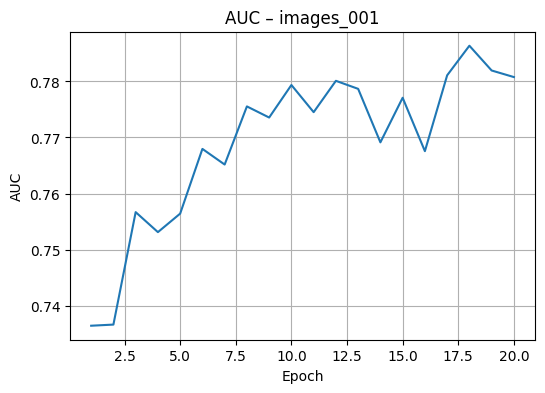

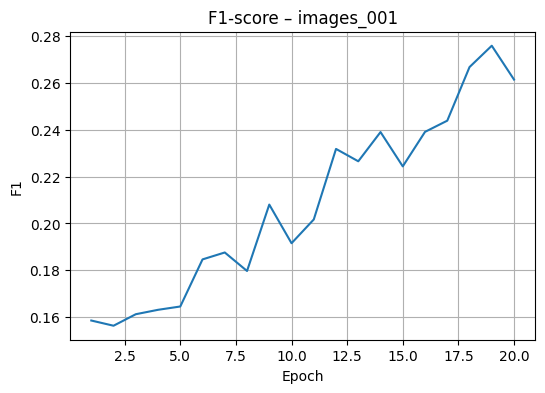

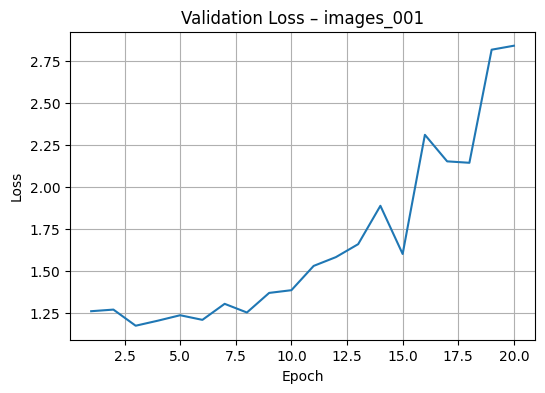

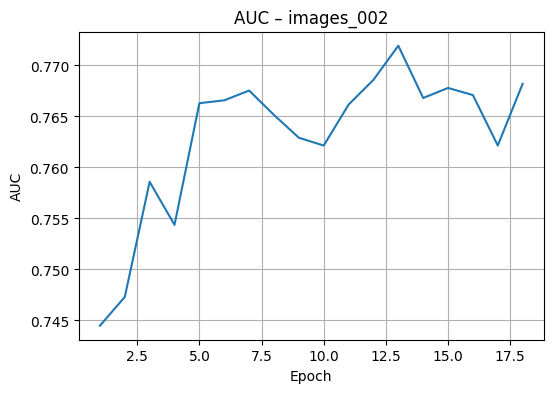

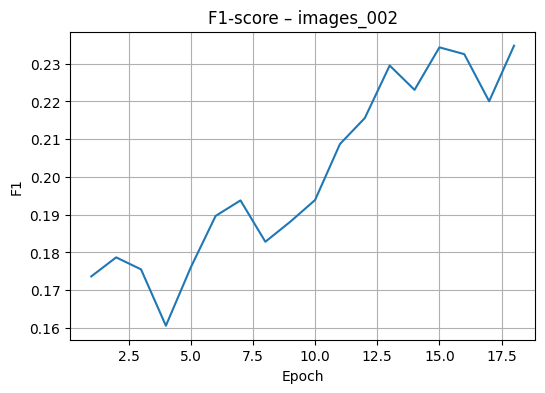

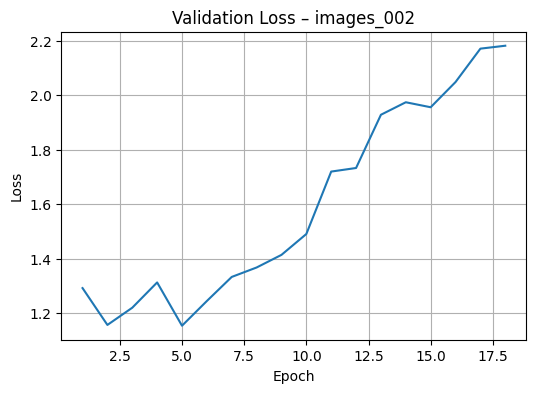

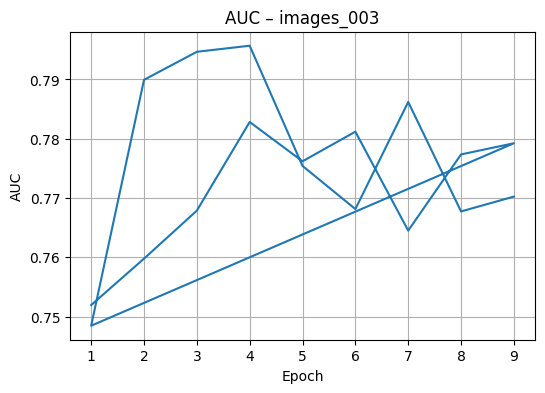

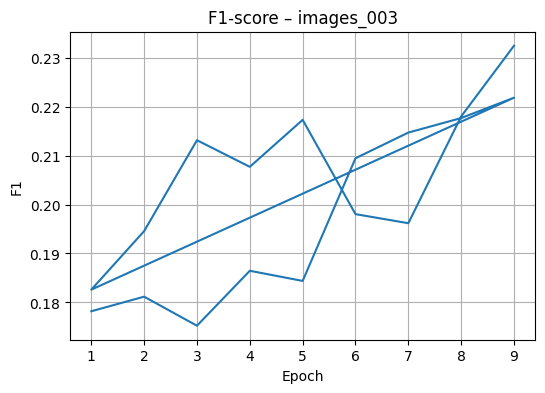

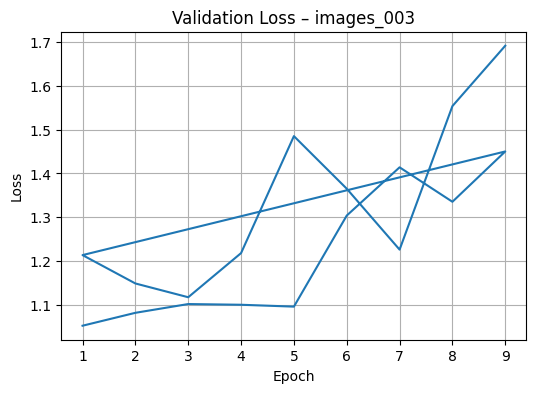

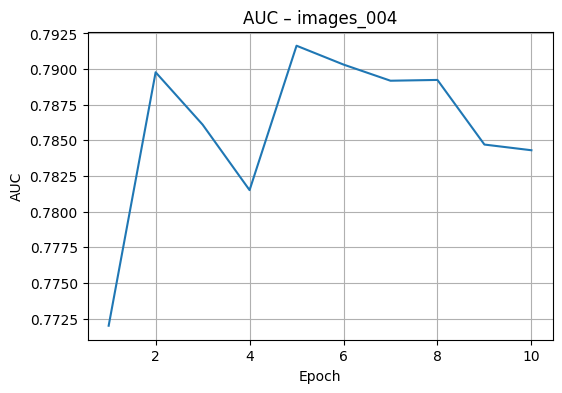

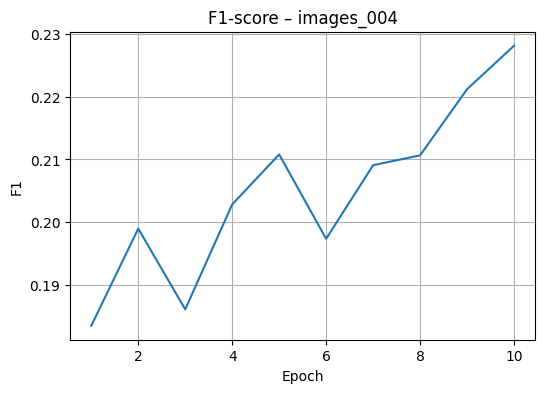

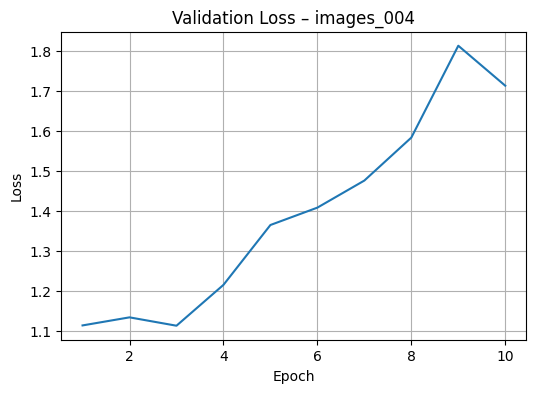

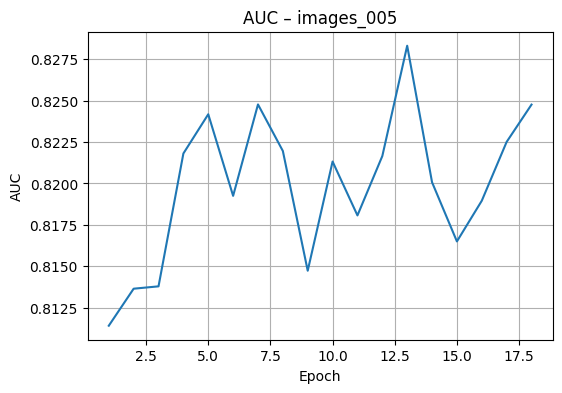

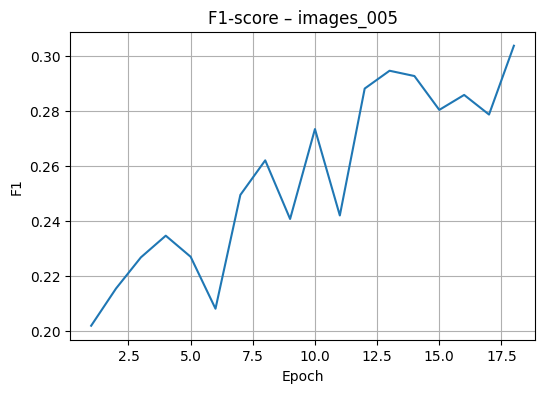

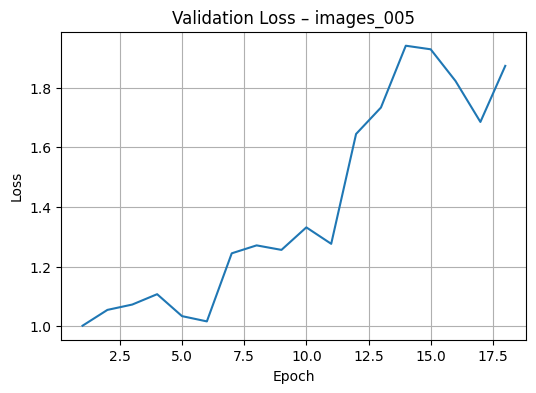

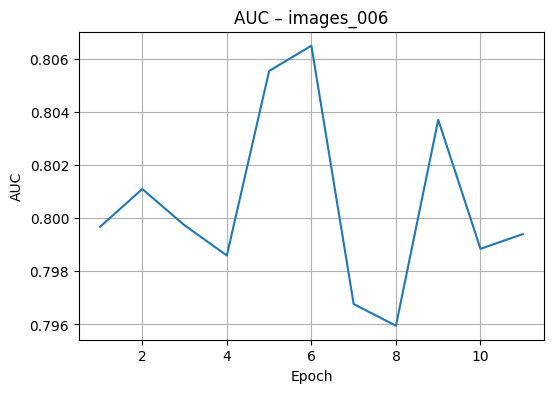

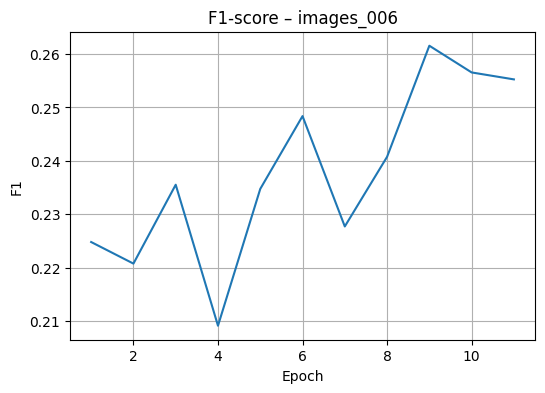

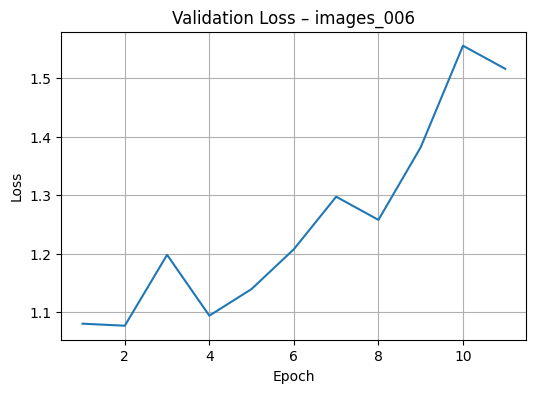

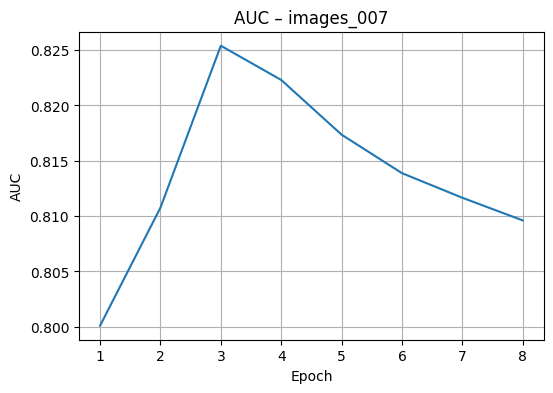

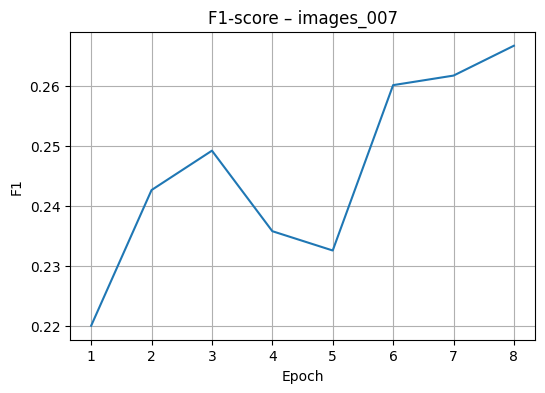

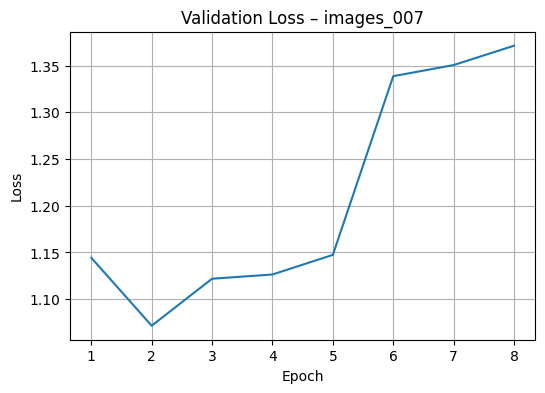

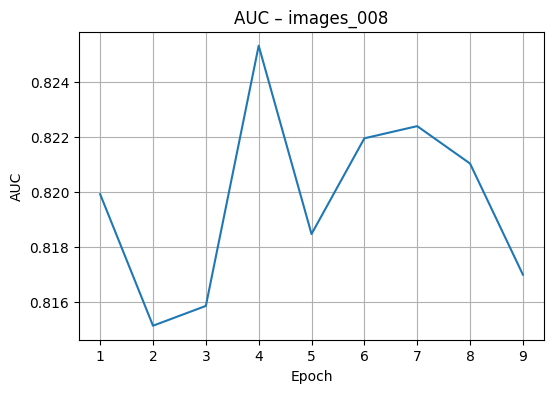

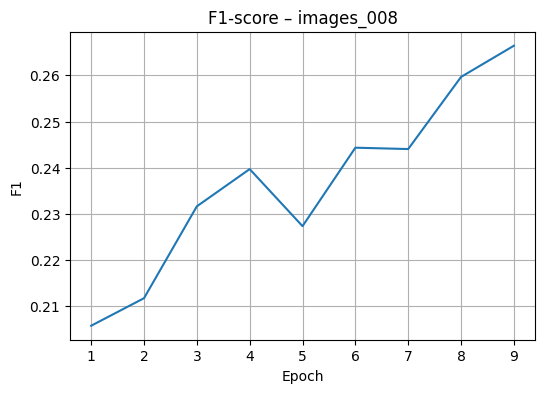

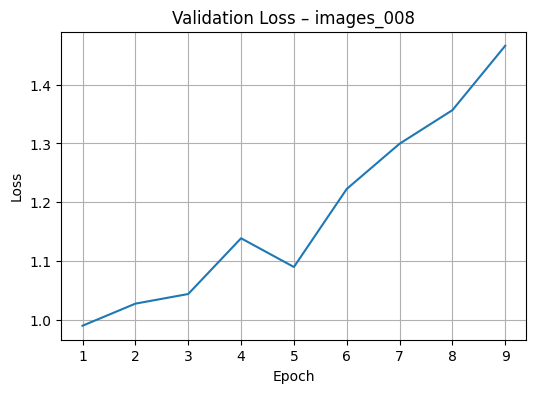

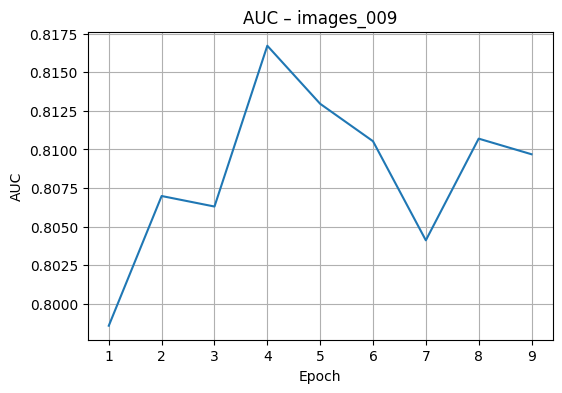

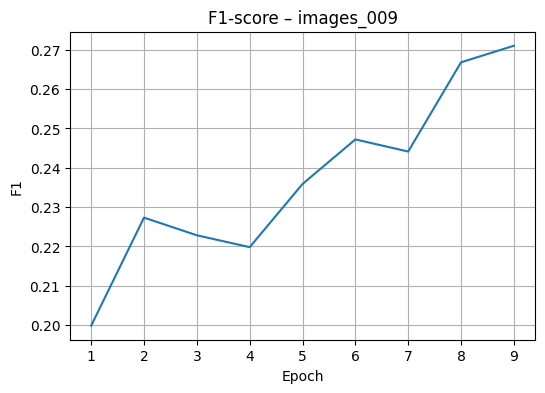

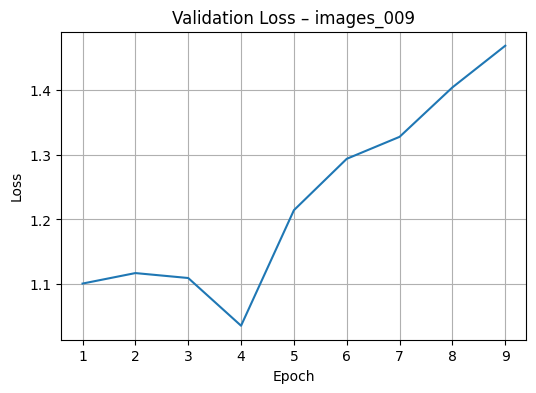

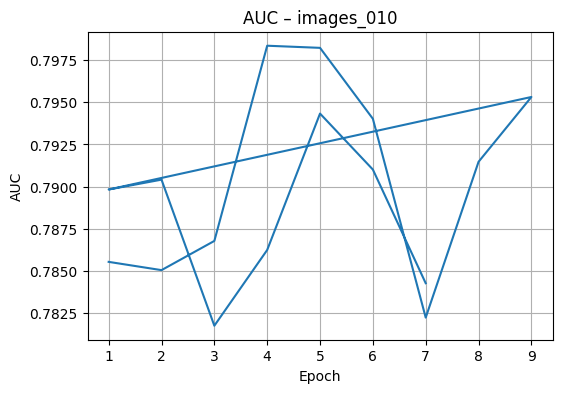

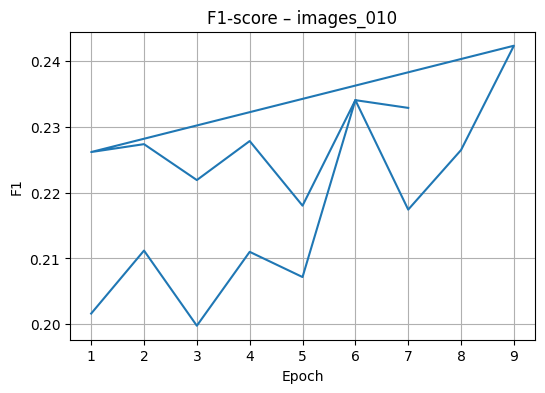

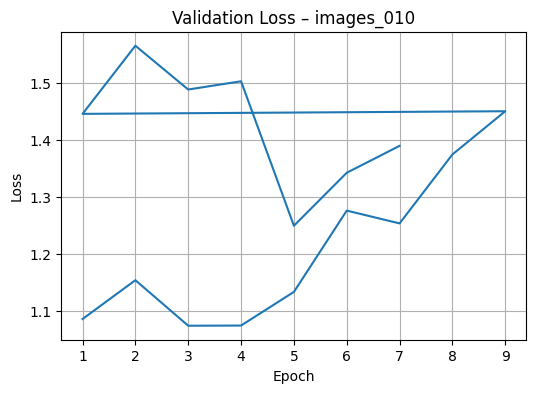

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# ===============================
# 1) Charger les données
# ===============================
DATA_DIR = "/content/drive/MyDrive/NIH_ChestXray"
RESULTS_CSV = os.path.join(DATA_DIR, "training_results_swin.csv")
df = pd.read_csv(RESULTS_CSV)

print("Aperçu du DataFrame :")
display(df.head())

# ===============================
# 2) Liste automatique des dossiers
# ===============================
folders = df["Folder"].unique()
print("\nDossiers détectés :", folders)

# ===============================
# 3) Résumé par dossier
# ===============================
summary = []

for folder in folders:
    d = df[df["Folder"] == folder]

    best_auc = d.loc[d["ValAUC"].idxmax()]
    best_f1  = d.loc[d["ValF1"].idxmax()]

    summary.append({
        "Folder": folder,
        "BestEpoch_AUC": int(best_auc["Epoch"]),
        "BestAUC": best_auc["ValAUC"],
        "BestEpoch_F1": int(best_f1["Epoch"]),
        "BestF1": best_f1["ValF1"]
    })

summary_df = pd.DataFrame(summary)
print("\n=== Résumé par dossier ===")
display(summary_df)

# ===============================
# 4) Trouver le meilleur dossier global
# ===============================
best_global_auc = summary_df.loc[summary_df["BestAUC"].idxmax()]
best_global_f1  = summary_df.loc[summary_df["BestF1"].idxmax()]

print("\n=== Meilleur dossier selon AUC ===")
display(best_global_auc)

print("\n=== Meilleur dossier selon F1 ===")
display(best_global_f1)

# ===============================
# 5) Graphiques pour chaque dossier
# ===============================
for folder in folders:
    d = df[df["Folder"] == folder]

    # ---- AUC ----
    plt.figure(figsize=(6,4))
    plt.plot(d["Epoch"], d["ValAUC"])
    plt.title(f"AUC – {folder}")
    plt.xlabel("Epoch")
    plt.ylabel("AUC")
    plt.grid()
    plt.show()

    # ---- F1 ----
    plt.figure(figsize=(6,4))
    plt.plot(d["Epoch"], d["ValF1"])
    plt.title(f"F1-score – {folder}")
    plt.xlabel("Epoch")
    plt.ylabel("F1")
    plt.grid()
    plt.show()

    # ---- Loss ----
    plt.figure(figsize=(6,4))
    plt.plot(d["Epoch"], d["ValLoss"])
    plt.title(f"Validation Loss – {folder}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid()
    plt.show()


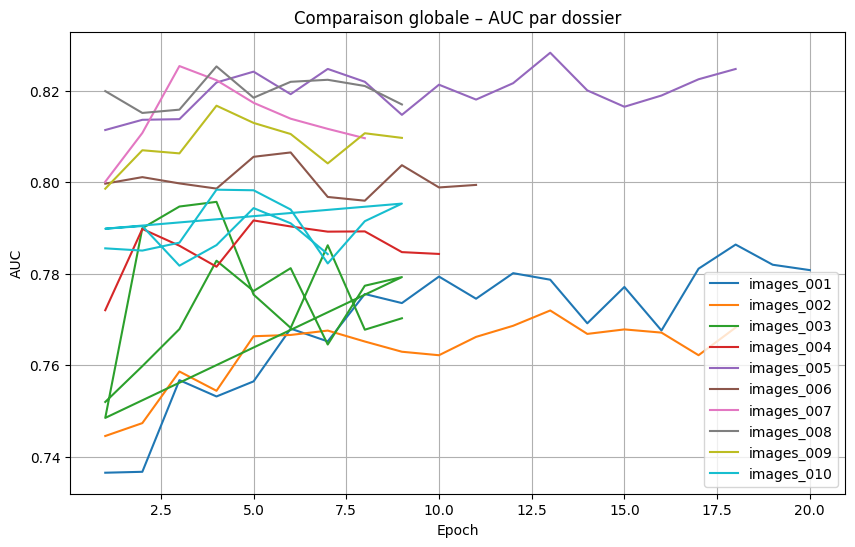

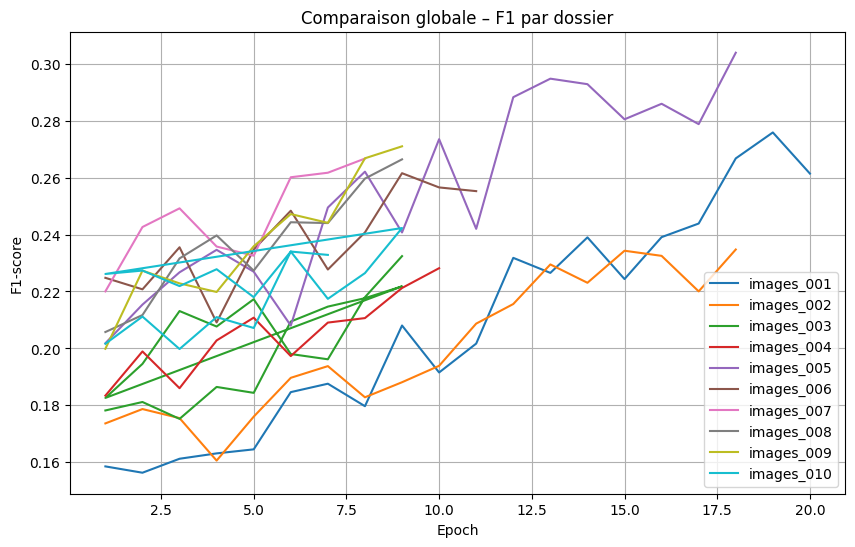

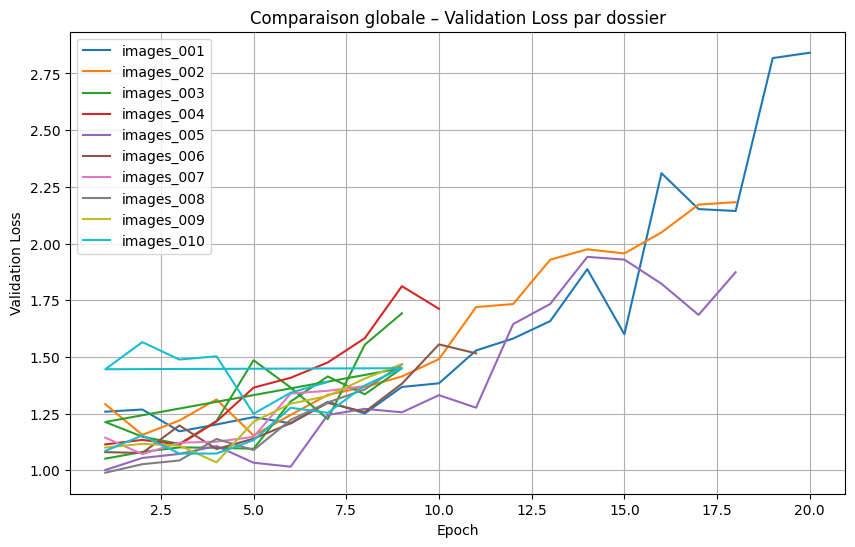

In [ ]:
import matplotlib.pyplot as plt

# ======================================
# 1) Comparaison AUC (tous les dossiers)
# ======================================
plt.figure(figsize=(10,6))

for folder in folders:
    d = df[df["Folder"] == folder]
    plt.plot(d["Epoch"], d["ValAUC"], label=folder)

plt.title("Comparaison globale – AUC par dossier")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()
plt.grid()
plt.show()


# ======================================
# 2) Comparaison F1-score (tous les dossiers)
# ======================================
plt.figure(figsize=(10,6))

for folder in folders:
    d = df[df["Folder"] == folder]
    plt.plot(d["Epoch"], d["ValF1"], label=folder)

plt.title("Comparaison globale – F1 par dossier")
plt.xlabel("Epoch")
plt.ylabel("F1-score")
plt.legend()
plt.grid()
plt.show()


# ======================================
# 3) Comparaison Loss (tous les dossiers)
# ======================================
plt.figure(figsize=(10,6))

for folder in folders:
    d = df[df["Folder"] == folder]
    plt.plot(d["Epoch"], d["ValLoss"], label=folder)

plt.title("Comparaison globale – Validation Loss par dossier")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid()
plt.show()


Aperçu du DataFrame :


,Folder,Epoch,TrainLoss,ValLoss,ValAUC,ValPrecision,ValRecall,ValF1
0,images_001,1,1.321466,1.258599,0.736454,0.109788,0.523456,0.158550
1,images_001,2,1.208559,1.268229,0.736655,0.104640,0.624977,0.156328
2,images_001,3,1.121596,1.172090,0.756700,0.103995,0.600404,0.161239
3,images_001,4,1.067636,1.202179,0.753134,0.099055,0.659437,0.163122
4,images_001,5,1.023008,1.234616,0.756434,0.107271,0.609093,0.164538



Dossiers détectés : ['images_001' 'images_002' 'images_003' 'images_004' 'images_005'
 'images_006' 'images_007' 'images_008' 'images_009' 'images_010'
 'images_011' 'images_012']

=== Résumé par dossier ===


,Folder,BestEpoch_AUC,BestAUC,BestEpoch_F1,BestF1
0,images_001,18,0.786357,19,0.275879
1,images_002,13,0.771939,18,0.234751
2,images_003,4,0.795698,9,0.232425
3,images_004,5,0.791635,10,0.228185
4,images_005,13,0.828317,18,0.303888
5,images_006,6,0.806505,9,0.261562
6,images_007,3,0.825401,8,0.266706
7,images_008,4,0.825319,9,0.266425
8,images_009,4,0.816729,9,0.271007
9,images_010,4,0.798359,9,0.251647



=== Meilleur dossier selon AUC ===


,4
Folder,images_005
BestEpoch_AUC,13
BestAUC,0.828317
BestEpoch_F1,18
BestF1,0.303888



=== Meilleur dossier selon F1 ===


,4
Folder,images_005
BestEpoch_AUC,13
BestAUC,0.828317
BestEpoch_F1,18
BestF1,0.303888


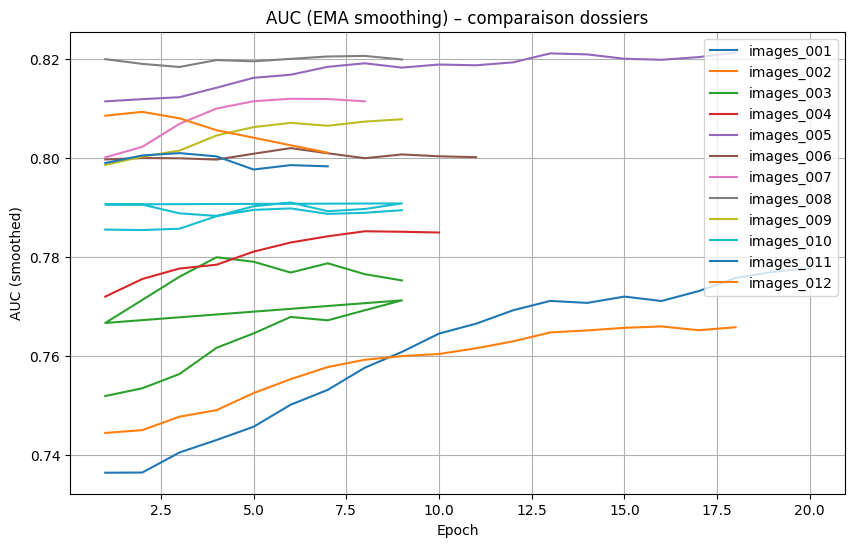

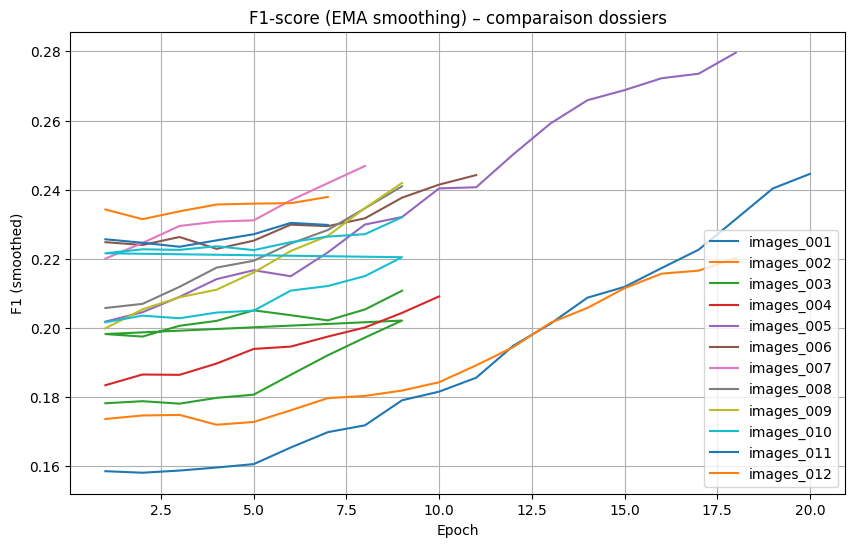

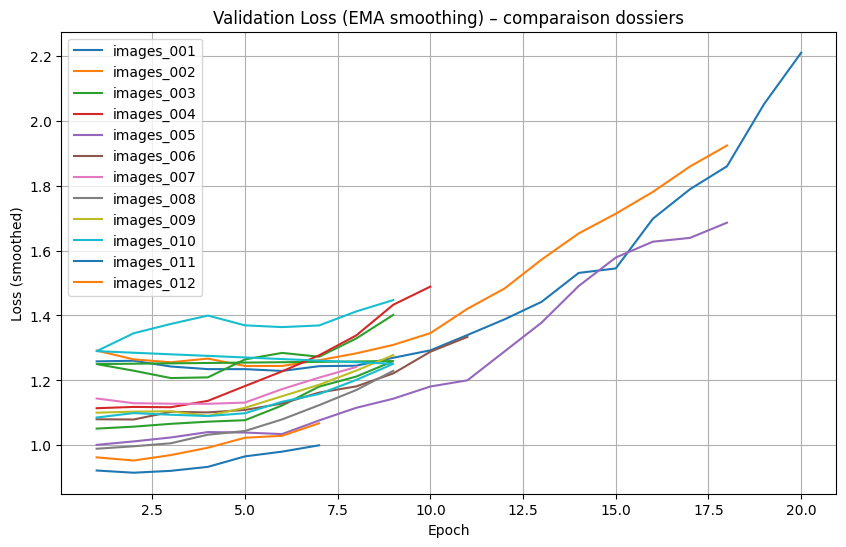

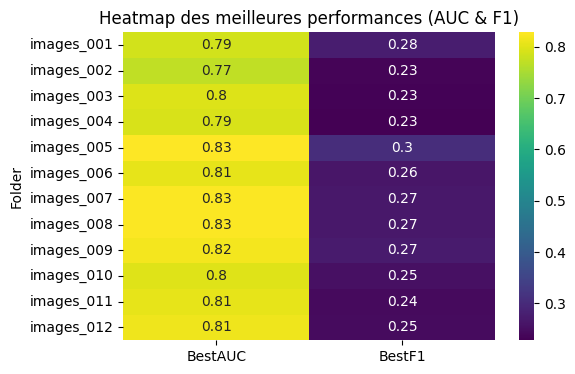


=== Détection automatique d’overfitting ===

⚠️ Overfitting détecté dans images_001 à l’epoch 5
⚠️ Overfitting détecté dans images_002 à l’epoch 4
⚠️ Overfitting détecté dans images_003 à l’epoch 3
⚠️ Overfitting détecté dans images_004 à l’epoch 5
⚠️ Overfitting détecté dans images_005 à l’epoch 3
⚠️ Overfitting détecté dans images_006 à l’epoch 6
⚠️ Overfitting détecté dans images_007 à l’epoch 4
⚠️ Overfitting détecté dans images_008 à l’epoch 3
⚠️ Overfitting détecté dans images_009 à l’epoch 6
⚠️ Overfitting détecté dans images_010 à l’epoch 5
⚠️ Overfitting détecté dans images_011 à l’epoch 4
⚠️ Overfitting détecté dans images_012 à l’epoch 4


In [ ]:
# =============================================
# 0) Imports
# =============================================
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# =============================================
# 1) Charger les données
# =============================================
DATA_DIR = "/content/drive/MyDrive/NIH_ChestXray"
RESULTS_CSV = os.path.join(DATA_DIR, "training_results_swin.csv")

df = pd.read_csv(RESULTS_CSV)

print("Aperçu du DataFrame :")
display(df.head())

# =============================================
# 2) Détection automatique des dossiers
# =============================================
folders = df["Folder"].unique()
print("\nDossiers détectés :", folders)

# =============================================
# 3) Résumé par dossier
# =============================================
summary = []

for folder in folders:
    d = df[df["Folder"] == folder]

    best_auc = d.loc[d["ValAUC"].idxmax()]
    best_f1  = d.loc[d["ValF1"].idxmax()]

    summary.append({
        "Folder": folder,
        "BestEpoch_AUC": int(best_auc["Epoch"]),
        "BestAUC": best_auc["ValAUC"],
        "BestEpoch_F1": int(best_f1["Epoch"]),
        "BestF1": best_f1["ValF1"]
    })

summary_df = pd.DataFrame(summary)

print("\n=== Résumé par dossier ===")
display(summary_df)

# =============================================
# 4) Meilleur dossier global
# =============================================
best_global_auc = summary_df.loc[summary_df["BestAUC"].idxmax()]
best_global_f1  = summary_df.loc[summary_df["BestF1"].idxmax()]

print("\n=== Meilleur dossier selon AUC ===")
display(best_global_auc)

print("\n=== Meilleur dossier selon F1 ===")
display(best_global_f1)

# =============================================
# 5) Smoothing EMA
# =============================================
def ema_smooth(values, alpha=0.2):
    smoothed = []
    last = values.iloc[0]
    for v in values:
        last = alpha * v + (1 - alpha) * last
        smoothed.append(last)
    return smoothed

# =============================================
# 6) Graphiques comparatifs avec smoothing
# =============================================

# --- AUC ---
plt.figure(figsize=(10,6))
for folder in folders:
    d = df[df["Folder"] == folder]
    auc_smooth = ema_smooth(d["ValAUC"])
    plt.plot(d["Epoch"], auc_smooth, label=folder)

plt.title("AUC (EMA smoothing) – comparaison dossiers")
plt.xlabel("Epoch")
plt.ylabel("AUC (smoothed)")
plt.legend()
plt.grid()
plt.show()

# --- F1 ---
plt.figure(figsize=(10,6))
for folder in folders:
    d = df[df["Folder"] == folder]
    f1_smooth = ema_smooth(d["ValF1"])
    plt.plot(d["Epoch"], f1_smooth, label=folder)

plt.title("F1-score (EMA smoothing) – comparaison dossiers")
plt.xlabel("Epoch")
plt.ylabel("F1 (smoothed)")
plt.legend()
plt.grid()
plt.show()

# --- Loss ---
plt.figure(figsize=(10,6))
for folder in folders:
    d = df[df["Folder"] == folder]
    loss_smooth = ema_smooth(d["ValLoss"])
    plt.plot(d["Epoch"], loss_smooth, label=folder)

plt.title("Validation Loss (EMA smoothing) – comparaison dossiers")
plt.xlabel("Epoch")
plt.ylabel("Loss (smoothed)")
plt.legend()
plt.grid()
plt.show()

# =============================================
# 7) Heatmap AUC + F1
# =============================================
summary_df2 = summary_df.set_index("Folder")[["BestAUC", "BestF1"]]

plt.figure(figsize=(6,4))
sns.heatmap(summary_df2, annot=True, cmap="viridis")
plt.title("Heatmap des meilleures performances (AUC & F1)")
plt.show()

# =============================================
# 8) Détection automatique d’overfitting
# =============================================
print("\n=== Détection automatique d’overfitting ===\n")

for folder in folders:
    d = df[df["Folder"] == folder].reset_index(drop=True)
    overfit_detected = False

    for i in range(2, len(d)):
        if d.loc[i, "ValLoss"] > d.loc[i-1, "ValLoss"] > d.loc[i-2, "ValLoss"]:
            if d.loc[i, "ValAUC"] <= d["ValAUC"].max():
                print(f"⚠️ Overfitting détecté dans {folder} à l’epoch {int(d.loc[i,'Epoch'])}")
                overfit_detected = True
                break

    if not overfit_detected:
        print(f"✔️ Pas d’overfitting clair dans {folder}")

# =============================================
# 9) Courbes interactives Plotly
# =============================================

# ---- AUC interactive ----
fig = go.Figure()

for folder in folders:
    d = df[df["Folder"] == folder]
    fig.add_trace(go.Scatter(
        x=d["Epoch"],
        y=d["ValAUC"],
        mode='lines',
        name=folder
    ))

fig.update_layout(
    title="AUC interactive – tous les dossiers",
    xaxis_title="Epoch",
    yaxis_title="AUC",
    hovermode="x unified"
)
fig.show()

# ---- F1 interactive ----
fig = go.Figure()

for folder in folders:
    d = df[df["Folder"] == folder]
    fig.add_trace(go.Scatter(
        x=d["Epoch"],
        y=d["ValF1"],
        mode='lines',
        name=folder
    ))

fig.update_layout(
    title="F1 interactive – tous les dossiers",
    xaxis_title="Epoch",
    yaxis_title="F1",
    hovermode="x unified"
)
fig.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Fichier CSV trouvé : /content/drive/MyDrive/NIH_ChestXray/training_results_swin.csv
Aperçu du DataFrame :


,Folder,Epoch,TrainLoss,ValLoss,ValAUC,ValPrecision,ValRecall,ValF1
0,images_001,1,1.321466,1.258599,0.736454,0.109788,0.523456,0.158550
1,images_001,2,1.208559,1.268229,0.736655,0.104640,0.624977,0.156328
2,images_001,3,1.121596,1.172090,0.756700,0.103995,0.600404,0.161239
3,images_001,4,1.067636,1.202179,0.753134,0.099055,0.659437,0.163122
4,images_001,5,1.023008,1.234616,0.756434,0.107271,0.609093,0.164538


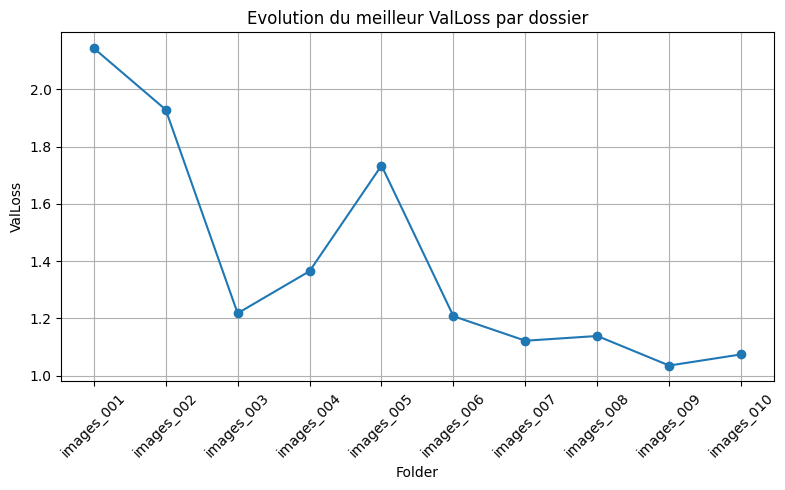

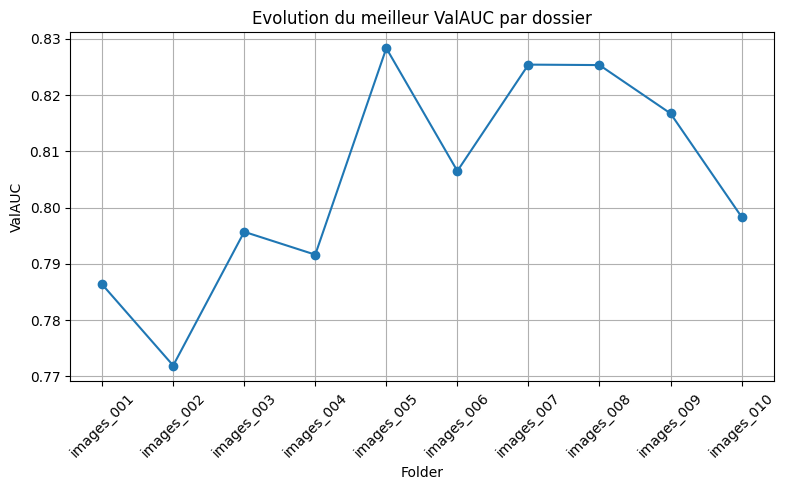

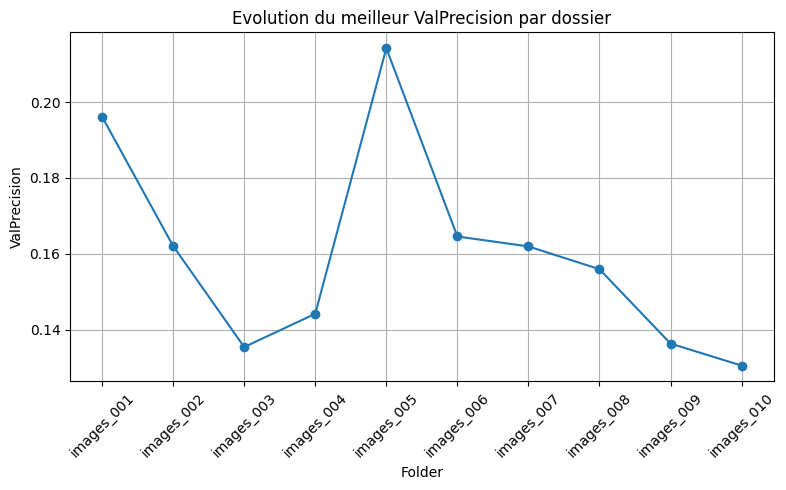

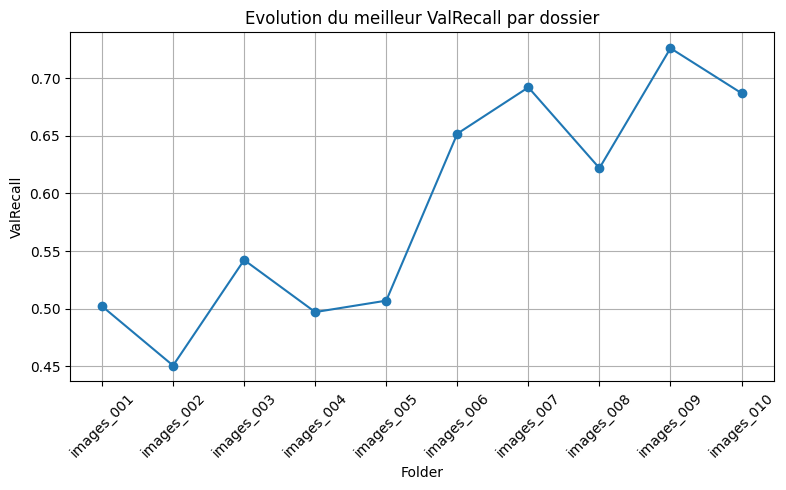

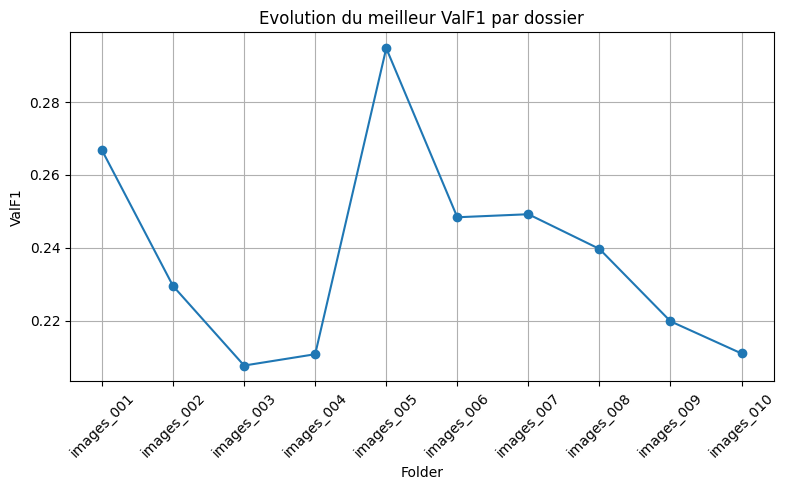

In [ ]:
# =============================================
# 0) Montons Google Drive
# =============================================
from google.colab import drive
drive.mount('/content/drive')

# =============================================
# 1) Imports
# =============================================
import os
import pandas as pd
import matplotlib.pyplot as plt

# =============================================
# 2) Définir le chemin CSV
# =============================================
DATA_DIR = "/content/drive/MyDrive/NIH_ChestXray"
RESULTS_CSV = os.path.join(DATA_DIR, "training_results_swin.csv")

# Vérifier si le fichier existe
if not os.path.exists(RESULTS_CSV):
    print("❌ Fichier CSV introuvable ! Vérifie le chemin :", RESULTS_CSV)
else:
    print("✅ Fichier CSV trouvé :", RESULTS_CSV)

# =============================================
# 3) Charger le CSV
# =============================================
df = pd.read_csv(RESULTS_CSV)

# Nettoyer les colonnes (espaces éventuels)
df.columns = [c.strip() for c in df.columns]

print("Aperçu du DataFrame :")
display(df.head())

# =============================================
# 4) Sélectionner le meilleur epoch de chaque dossier (meilleur ValAUC)
# =============================================
best_by_folder = df.loc[df.groupby("Folder")["ValAUC"].idxmax()].sort_values("Folder")

# =============================================
# 5) Courbes pour chaque métrique
# =============================================
metrics = ["ValLoss", "ValAUC", "ValPrecision", "ValRecall", "ValF1"]

for metric in metrics:
    plt.figure(figsize=(8,5))
    plt.plot(best_by_folder["Folder"], best_by_folder[metric], marker="o", linestyle="-")
    plt.title(f"Evolution du meilleur {metric} par dossier")
    plt.xlabel("Folder")
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ CSV file found: /content/drive/MyDrive/NIH_ChestXray/training_results_swin.csv
DataFrame preview:


,Folder,Epoch,TrainLoss,ValLoss,ValAUC,ValPrecision,ValRecall,ValF1
0,images_001,1,1.321466,1.258599,0.736454,0.109788,0.523456,0.158550
1,images_001,2,1.208559,1.268229,0.736655,0.104640,0.624977,0.156328
2,images_001,3,1.121596,1.172090,0.756700,0.103995,0.600404,0.161239
3,images_001,4,1.067636,1.202179,0.753134,0.099055,0.659437,0.163122
4,images_001,5,1.023008,1.234616,0.756434,0.107271,0.609093,0.164538


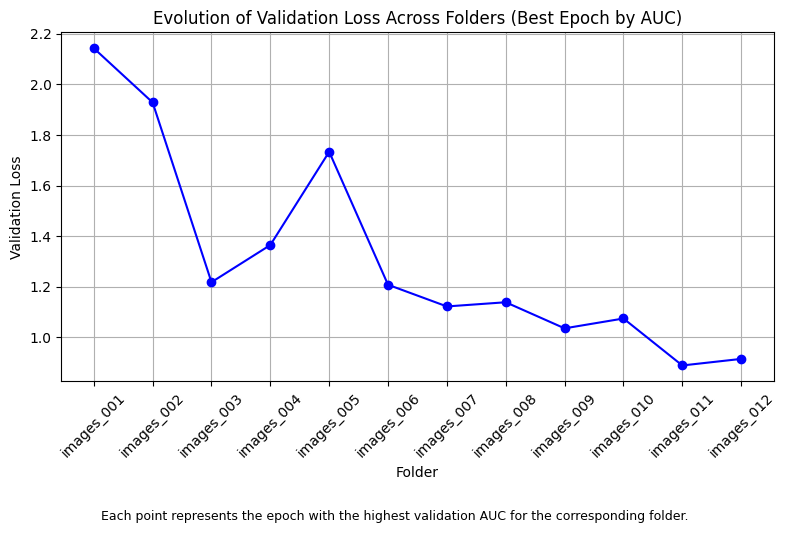

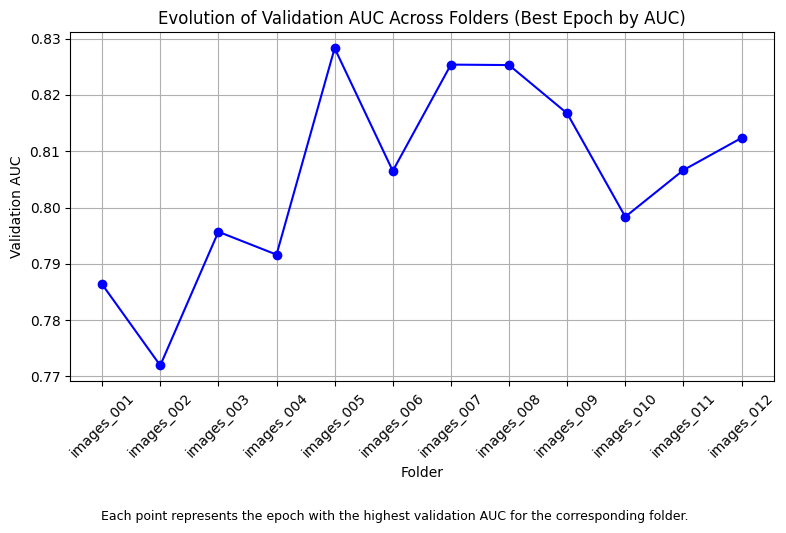

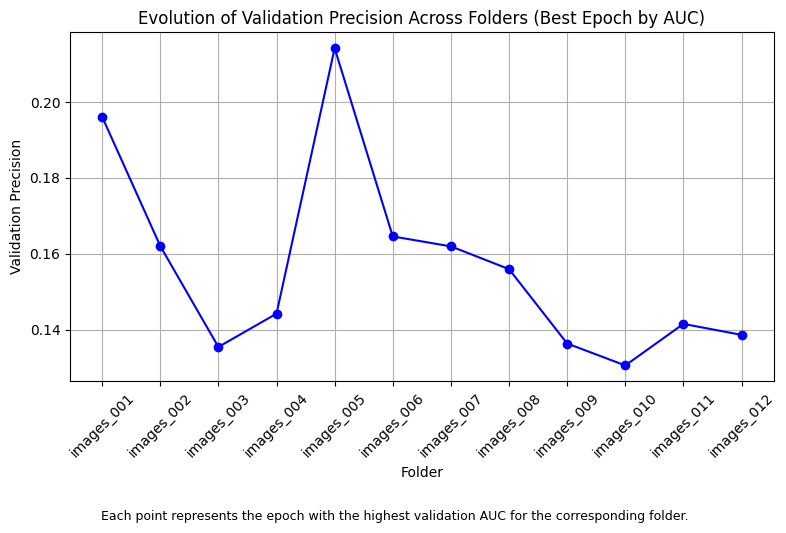

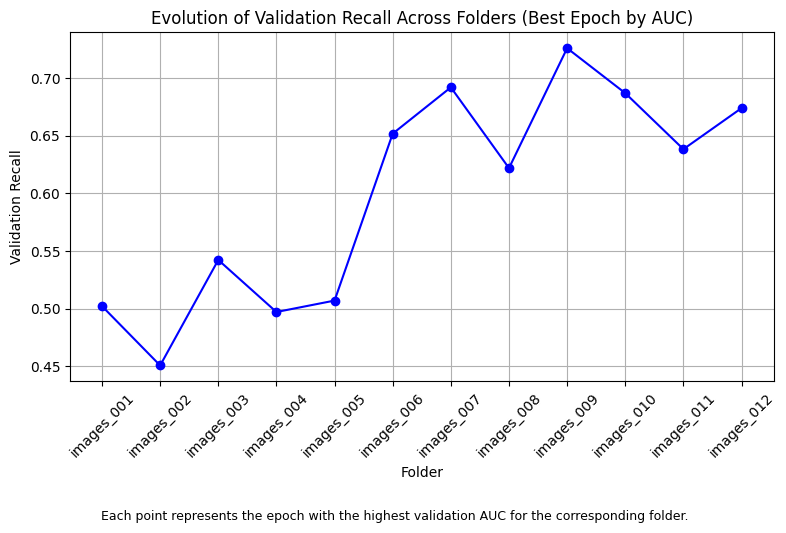

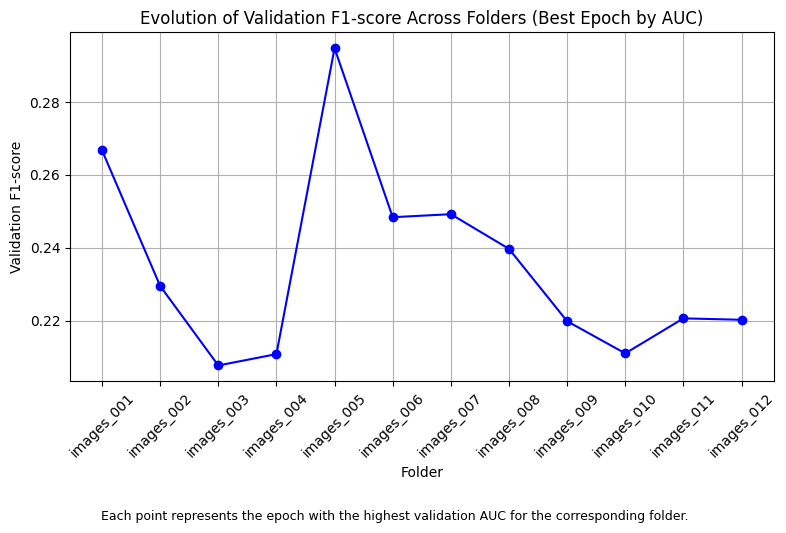

In [ ]:
# =============================================
# 0) Mount Google Drive
# =============================================
from google.colab import drive
drive.mount('/content/drive')

# =============================================
# 1) Imports
# =============================================
import os
import pandas as pd
import matplotlib.pyplot as plt

# =============================================
# 2) CSV Path
# =============================================
DATA_DIR = "/content/drive/MyDrive/NIH_ChestXray"
RESULTS_CSV = os.path.join(DATA_DIR, "training_results_swin.csv")

# Check if CSV exists
if not os.path.exists(RESULTS_CSV):
    print("❌ CSV file not found! Check the path:", RESULTS_CSV)
else:
    print("✅ CSV file found:", RESULTS_CSV)

# =============================================
# 3) Load CSV
# =============================================
df = pd.read_csv(RESULTS_CSV)
df.columns = [c.strip() for c in df.columns]

print("DataFrame preview:")
display(df.head())

# =============================================
# 4) Select best epoch per folder (highest ValAUC)
# =============================================
best_by_folder = df.loc[df.groupby("Folder")["ValAUC"].idxmax()].sort_values("Folder")

# =============================================
# 5) Plot each metric with titles and legends in English
# =============================================
metrics_info = {
    "ValLoss": "Validation Loss",
    "ValAUC": "Validation AUC",
    "ValPrecision": "Validation Precision",
    "ValRecall": "Validation Recall",
    "ValF1": "Validation F1-score"
}

for metric, metric_name in metrics_info.items():
    plt.figure(figsize=(8,5))
    plt.plot(best_by_folder["Folder"], best_by_folder[metric], marker="o", linestyle="-", color='b')
    plt.title(f"Evolution of {metric_name} Across Folders (Best Epoch by AUC)", fontsize=12)
    plt.xlabel("Folder", fontsize=10)
    plt.ylabel(metric_name, fontsize=10)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.figtext(0.5, -0.05,
                "Each point represents the epoch with the highest validation AUC for the corresponding folder.",
                wrap=True, horizontalalignment='center', fontsize=9)
    plt.show()
